In [1]:

import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix 
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline      

In [2]:
df = pd.read_csv("train1.csv") 

In [11]:
df.head(18)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23


In [6]:
df.columns 

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
id                  20000 non-null uint64
click               20000 non-null int64
hour                20000 non-null int64
C1                  20000 non-null int64
banner_pos          20000 non-null int64
site_id             20000 non-null object
site_domain         20000 non-null object
site_category       20000 non-null object
app_id              20000 non-null object
app_domain          20000 non-null object
app_category        20000 non-null object
device_id           20000 non-null object
device_ip           20000 non-null object
device_model        20000 non-null object
device_type         20000 non-null int64
device_conn_type    20000 non-null int64
C14                 20000 non-null int64
C15                 20000 non-null int64
C16                 20000 non-null int64
C17                 20000 non-null int64
C18                 20000 non-null int64
C19                 

In [8]:
df.duplicated().sum()

0

Saare Categorical Variables as detected by python

In [9]:
df.select_dtypes(include = ['object']).columns


Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model'],
      dtype='object')

Yeh avazu ke site pe likha hai about features iska matlab nahi smjh raha ki konse hai yeh:- besides, all integer features are categorical variables, they are all IDs and have no numerical meaning
Edit :- Mere hisab se upar wale saare variables ka koi matlab nhi hai par not sure

In [12]:
'''
Saare numerical attributes mere hisab se jo hone chahiye 
'''


numeric_cols = ['banner_pos','C1','device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21' ]


In [17]:
categorical_cols = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model' , 'click']

In [18]:
df[numeric_cols].describe()


,banner_pos,C1,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.198650,1005.048400,1.063100,0.202200,17721.318850,318.351800,56.98550,1969.180150,0.794800,130.210500,38081.476200,88.357300
std,0.403108,1.107844,0.597943,0.643145,3168.514568,11.044091,37.52085,387.401124,1.228686,240.719826,48598.795068,45.234093
min,0.000000,1001.000000,0.000000,0.000000,375.000000,216.000000,36.00000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,0.000000,1005.000000,1.000000,0.000000,15704.000000,320.000000,50.00000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,0.000000,1005.000000,1.000000,0.000000,17654.000000,320.000000,50.00000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,0.000000,1005.000000,1.000000,0.000000,20362.000000,320.000000,50.00000,2307.000000,2.000000,39.000000,100083.000000,117.000000
max,5.000000,1010.000000,5.000000,5.000000,21705.000000,728.000000,480.00000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


Device type and C1 ka kuch matlab nahi hai lagta hai

In [19]:
df[categorical_cols].describe(include = ['O'])

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,497,415,14,398,38,15,2039,12777,1552
top,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,7037,7037,7575,15634,16614,15758,17354,168,1356


In [20]:
pd.crosstab(df['site_category'], df['click']).sort_values(1,0, ascending = False).head(10)

'''
Yeh bata raha hai ki kitne ad clicks hai as per different site catregories. 
'''


click,0,1
site_category,,
28905ebd,6027,1548
f028772b,3093,833
50e219e0,4485,583
3e814130,2098,403
335d28a8,236,35
76b2941d,355,15
72722551,49,8
75fa27f6,26,6
0569f928,129,2


In [21]:
df.isnull().sum() 

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

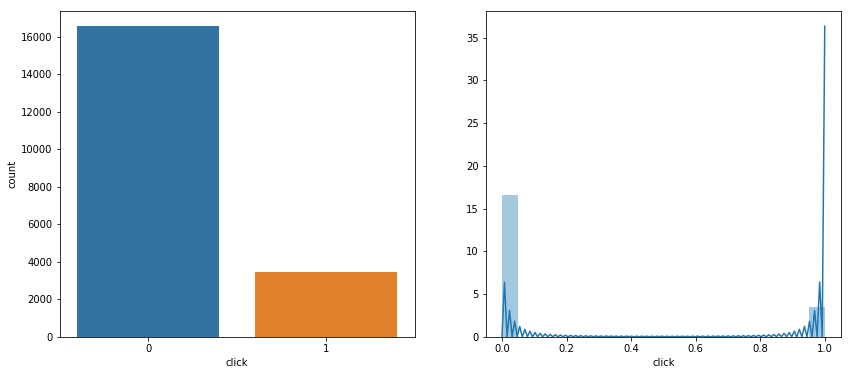

In [22]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'click', data = df)
plt.subplot(1,2,2)
sns.distplot(df["click"], bins = 20)
plt.show()

This is to show number of people who clicked on an Ad v/s people who didnt 